In [10]:
import wave
import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# глобальные переменные
delta = 50
reduceCount = 5

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

In [11]:
# Запись массива сэмплов в файл
def printSamples(samples):
    output = open("samples.txt", "w")
    for sample in samples:
        string ='{:.2f}'.format(sample)
        output.write(string + '\n')
    output.close()

In [35]:
def printSamplesInFile(samples, filename):
    output = open(filename, "w")
    for sample in samples:
        string ='{:.2f}'.format(sample)
        output.write(string + '\n')
    output.close()

In [12]:
# Свертка (сжимает массив сэмплов, усредняя значения)
def cutSamples(samples):
    i = 0
    values = []
    while i + delta < samples.size:
        samplesSlice = samples[i:i+delta]
        samplesSlice = list(map(lambda x: abs(x), samplesSlice))
        samplesSlice.sort()
        samplesSlice = samplesSlice[reduceCount : delta - reduceCount]
        value = sum(samplesSlice) / len(samplesSlice)
        values.append(value)
        i = i + delta
    
    return values

In [13]:
# Обрезка файла    
def cutAudio(fileName, source, target, outputName): 
    inputFile = wave.open(fileName, mode="r")
    (channels, sWidth, rate, framesCount, comptype, compname) = inputFile.getparams()
    
    content = inputFile.readframes(framesCount)
    samples = np.fromstring(content, dtype=types[sWidth])
    samples = samples[round(source*rate):round(target*rate)]

    outputFile = wave.open(outputName, mode="w")
    outputFile.setparams((channels, sWidth, rate, samples.size, comptype, compname))
    outputFile.writeframes(samples)
    outputFile.close()
    
    return cutSamples(samples)

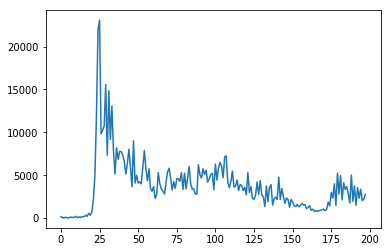

In [14]:
values = cutAudio("40min.wav", 5.22, 5.67, "5,1-5,8.wav")

pylab.plot(values)
pylab.show()

In [20]:
recordName = "records/Шишкина 17.02.15_new.wav"
wav = wave.open(recordName, mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
print(nchannels, sampwidth, framerate, nframes, comptype, compname)

duration = nframes / framerate
content = wav.readframes(nframes)
samples = np.fromstring(content, dtype=types[sampwidth])
values = cutSamples(samples)
printSamples(values)

# нахождение пиков в записи
frameOnCut = []
i = 20
prevResults = i
while i < len(values):
    if values[i] > 10000:
        slice = values[i-prevResults:i]
        minPrevValue = min(slice)
        if values[i] / minPrevValue > 20:
            frameOnCut.append(i)
            i += 150
            continue
    i += 1

# переводим величины массива frameOnCut из порядкового номера фрейма в секунды
frameOnCut = list(map(lambda x: x*delta, frameOnCut))
frameOnCut = list(map(lambda x: x/framerate, frameOnCut))
print(len(frameOnCut))
print(frameOnCut)

# вырезаем аудио-файл с каждым пиком и строим диаграмму
for framePik in frameOnCut:
    endPath = '{:.2f}'.format(framePik)
    path = "results/sounds/result_" + endPath + ".wav"
    imagePath = "results/graphics/result_" + endPath + ".png"
    path = path.replace(".", ",", 1)
    imagePath = imagePath.replace(".", ",", 1)
    values = cutAudio(recordName, framePik-0.05, framePik+0.4, path)
    plt.plot(values)
    plt.savefig(imagePath)
    plt.close()

1 2 22050 191021056 NONE not compressed
797
[5.421768707482993, 9.682539682539682, 12.884353741496598, 14.675736961451246, 16.523809523809526, 25.13605442176871, 38.766439909297056, 40.74829931972789, 52.83219954648526, 53.64625850340136, 55.68027210884354, 57.36734693877551, 59.01133786848072, 60.44671201814059, 61.038548752834465, 106.80272108843538, 133.9954648526077, 136.91836734693877, 137.26984126984127, 138.61451247165533, 139.12471655328798, 140.702947845805, 141.48979591836735, 142.01814058956916, 143.40816326530611, 158.17460317460316, 158.68253968253967, 159.65532879818593, 160.17233560090702, 161.30612244897958, 161.82993197278913, 162.9251700680272, 164.63945578231292, 165.36281179138322, 166.88888888888889, 167.73696145124717, 169.05442176870747, 171.08163265306123, 174.01814058956916, 175.42857142857142, 176.34467120181407, 178.6734693877551, 218.0793650793651, 258.0362811791383, 361.09977324263036, 363.0498866213152, 366.8299319727891, 370.2471655328798, 457.98412698412

In [44]:
import os
def convertSoundsInSamples(directory):
    files = os.listdir(directory)
    sounds = filter(lambda x: x.endswith('.wav'), files)

    for sound in sounds:
        wav = wave.open(directory + "/" + sound, mode="r")
        (nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()

        content = wav.readframes(nframes)
        samples = np.fromstring(content, dtype=types[sampwidth])
        cuttedSamples = cutSamples(samples)
        filename = sound[:-3]
        printSamplesInFile(cuttedSamples, directory + "/samples/" + filename + "txt")

In [48]:
import os
convertSoundsInSamples("results/кашель")
convertSoundsInSamples("results/не кашель")